ĐỀ TÀI: DỰ ĐOÁN GIÁ XE ĐÃ QUA SỬ DỤNG

Sinh viên thực hiện: Lương Văn Sang

MSSV: 2217480201015

Môn: Trí tuệ nhân tạo

1. Mục tiêu
- Xây dựng mô hình hồi quy tuyến tính dự đoán giá xe đã qua sử dụng.
- Sử dụng các đặc trưng: brand, year, mileage, engine_size, fuel_type, transmission.
- Đánh giá mô hình bằng MAE, MSE, RMSE và hệ số xác định R^2.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         489 non-null    object 
 1   year          489 non-null    int64  
 2   mileage       489 non-null    int64  
 3   engine_size   489 non-null    float64
 4   fuel_type     489 non-null    object 
 5   transmission  489 non-null    object 
 6   price         489 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 26.9+ KB


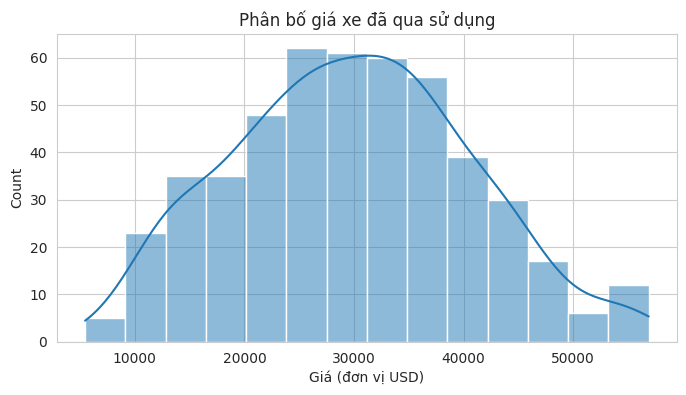

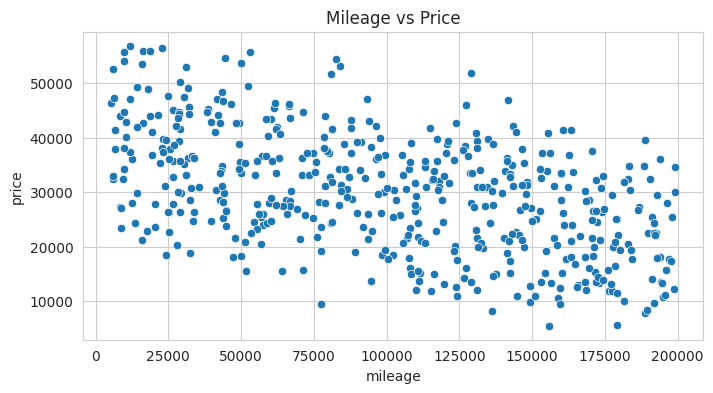

MAE:  1735.33
MSE:  4819293.02
RMSE: 2195.29
R²:   0.965


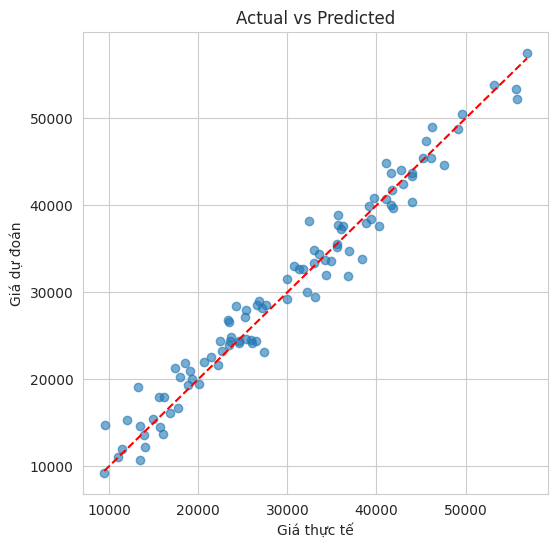

Giá dự đoán khi mileage = 18234: 7879827.14 USD


,brand,year,mileage,engine_size,fuel_type,transmission,price
0,Toyota,2006,43494,3.1,Electric,Manual,34874.54
1,Ford,2019,8373,1.6,Petrol,Manual,27280.43
2,Audi,2014,148233,3.2,Hybrid,Manual,31850.48
3,Toyota,2010,102532,2.6,Electric,Automatic,30422.97
4,Audi,2007,97658,3.1,Electric,Manual,39867.40


In [10]:
# 2. Import thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score
)

sns.set_style('whitegrid')

# 3. Đọc dữ liệu
df = pd.read_csv('used_car_prices.csv')
df.head()

# 4. Khám phá dữ liệu
df.info()
df.describe(include='all')
df.isna().sum()

# 5. Tiền xử lý
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

# 6. Trực quan hóa
plt.figure(figsize=(8,4))
sns.histplot(df['price'], kde=True)
plt.title('Phân bố giá xe đã qua sử dụng')
plt.xlabel('Giá (đơn vị USD)')
plt.show()

plt.figure(figsize=(8,4))
sns.scatterplot(x='mileage', y='price', data=df)
plt.title('Mileage vs Price')
plt.show()

# 7. Xây dựng mô hình hồi quy
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
model = LinearRegression()
model.fit(X_train, y_train)

# 8. Dự đoán & Đánh giá
y_pred = model.predict(X_test)

mae  = mean_absolute_error(y_test, y_pred)    # Mean Absolute Error
mse  = mean_squared_error(y_test, y_pred)     # Mean Squared Error
rmse = np.sqrt(mse)                            # Root MSE
r2   = r2_score(y_test, y_pred)                # R²

print(f'MAE:  {mae:.2f}')
print(f'MSE:  {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R²:   {r2:.3f}')

# 9. Trực quan kết quả dự đoán
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Giá thực tế')
plt.ylabel('Giá dự đoán')
plt.title('Actual vs Predicted')
plt.show()

# 10. Dự đoán giá với mileage = 18234
# Tự tạo DataFrame với mileage = 18234, các features còn lại = 0
df_new = pd.DataFrame([[18234] + [0]*(X.shape[1]-1)], columns=X.columns)
pred_price = model.predict(df_new)
print(f"Giá dự đoán khi mileage = 18234: {pred_price[0]:.2f} USD")

df.head()